In [1]:
# Import dependencies:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Read csv file consisting of cleaned data and store it in a dataframe:

data = "Data/cleaned_data.csv"
df = pd.read_csv(data)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_dmConLI,SaleType_dmConLw,SaleType_dmNew,SaleType_dmOth,SaleType_dmWD,SaleCondition_dmAdjLand,SaleCondition_dmAlloca,SaleCondition_dmFamily,SaleCondition_dmNormal,SaleCondition_dmPartial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [3]:
# Keep only the features that we want to test, as determined in the feature importance portion of data cleanup:

df = df[['OverallQual',
 'GrLivArea',
 '2ndFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'FullBath',
 'LotArea',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'YearRemodAdd',
 'YearBuilt',
 'LotFrontage',
 'GarageYrBlt',
 'BsmtUnfSF',
 'OpenPorchSF',
 'MasVnrArea',
 'OverallCond',
 'WoodDeckSF','SalePrice']]

df.head()

,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,BsmtFinSF1,1stFlrSF,FullBath,LotArea,TotRmsAbvGrd,GarageCars,...,YearRemodAdd,YearBuilt,LotFrontage,GarageYrBlt,BsmtUnfSF,OpenPorchSF,MasVnrArea,OverallCond,WoodDeckSF,SalePrice
0,7,1710,854,856,706,856,2,8450,8,2,...,2003,2003,65.0,2003.0,150,61,196.0,5,0,208500
1,6,1262,0,1262,978,1262,2,9600,6,2,...,1976,1976,80.0,1976.0,284,0,0.0,8,298,181500
2,7,1786,866,920,486,920,2,11250,6,2,...,2002,2001,68.0,2001.0,434,42,162.0,5,0,223500
3,7,1717,756,756,216,961,1,9550,7,3,...,1970,1915,60.0,1998.0,540,35,0.0,5,0,140000
4,8,2198,1053,1145,655,1145,2,14260,9,3,...,2000,2000,84.0,2000.0,490,84,350.0,5,192,250000


In [4]:
# Extract the target variable from dataset:

X = df.drop(columns = ["SalePrice"])
Y = df["SalePrice"].values.reshape(-1, 1)

In [5]:
# Split data into train and test datasets:

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [8]:
# Create and fit linear regression model to train dataset:

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train_scaled)

C:\Users\jadha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor()

In [10]:
# Make predictions using the model:

predictions = model.predict(X_test_scaled)

In [ ]:
#pd.DataFrame({'predictions':predictions, 'y_test':y_test}).head(50)

In [ ]:
#y_test.to_numpy(dtype=None, copy=False)

In [11]:
# Determine mean_squared_error and model accuracy score:

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

In [12]:
# Print mean squared error and model accuracy score:

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.12624597726798864, R2: 0.8658407708289628


In [ ]:
# Save model as a pkl file:

import pickle
pickle.dump(model, open(".../model.pkl","wb"))

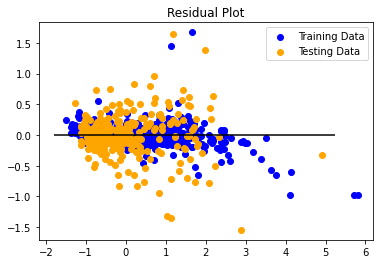

In [22]:
# Plot the model's predicted values and actual values:

plt.scatter(predictions, predictions - y_train_scaled, c="blue", label="Training Data")

predictions_test = model.predict(X_test_scaled)
predictions_test = predictions_test.reshape(-1, 1)

plt.scatter(predictions_test, predictions_test - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [21]:
# predictions = model.predict(X_train_scaled)

predictions = predictions.reshape(-1, 1)
# predictions

predictions.shape

(820, 1)

# Hyperparameter Tuning

In [25]:
model_2 = RandomForestRegressor(max_leaf_nodes=100, random_state=1)
model_2.fit(X_train_scaled, y_train_scaled)
predictions = model_2.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model_2.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE} r2: {r2}")

C:\Users\jadha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MSE: 0.13083794514350677 r2: 0.8609609728037952


In [28]:
model_3 = RandomForestRegressor(max_leaf_nodes=27000, random_state=1)
model_3.fit(X_train_scaled, y_train_scaled)
predictions = model_3.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model_3.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE} r2: {r2}")

C:\Users\jadha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MSE: 0.1295327002593949 r2: 0.8623480320299295


In [29]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [32]:
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train_scaled)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)
# Model Performance

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.6min


KeyboardInterrupt: 